### Pima Indian Diabetes data preprocessing

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# diabetes data
diabetes =  pd.read_csv('E:/RESEARCH/Datasets/pima/diabetes.csv', sep=',')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,sub
0,6,148,72,35,0,33.6,0.627,50,1,s1
1,1,85,66,29,0,26.6,0.351,31,0,s2
2,8,183,64,0,0,23.3,0.672,32,1,s3
3,1,89,66,23,94,28.1,0.167,21,0,s4
4,0,137,40,35,168,43.1,2.288,33,1,s5


In [11]:
diabetes.shape

(768, 10)

In [12]:
diabetes['null1'] = 0

In [13]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,sub,null1
0,6,148,72,35,0,33.6,0.627,50,1,s1,0
1,1,85,66,29,0,26.6,0.351,31,0,s2,0
2,8,183,64,0,0,23.3,0.672,32,1,s3,0
3,1,89,66,23,94,28.1,0.167,21,0,s4,0
4,0,137,40,35,168,43.1,2.288,33,1,s5,0


In [14]:
#remove sub, outcome. 
dia9 = diabetes.drop(['sub','Outcome'], axis=1)
dia9.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,null1
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,0


In [15]:
# 우리가 만들 분석모델의 target인 y는 disorder
y = diabetes.loc[:,['Outcome']]
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [16]:
# 환자만 따로 뽑으면
patient = diabetes.loc[:, ['sub']]
patient.head

<bound method NDFrame.head of       sub
0      s1
1      s2
2      s3
3      s4
4      s5
..    ...
763  s764
764  s765
765  s766
766  s767
767  s768

[768 rows x 1 columns]>

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dia9[:] = scaler.fit_transform(dia9[:])

In [18]:
dia9.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,null1
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,0.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,0.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,0.0


In [19]:
dia9.shape

(768, 9)

In [20]:
# Checking values
x0 = dia9.loc[450].values

In [21]:
x0

array([0.05882353, 0.4120603 , 0.52459016, 0.13131313, 0.11229314,
       0.31594635, 0.14389411, 0.03333333, 0.        ])

In [22]:
# 3 x 3으로 reshape
x0 = x0.reshape(3,3)

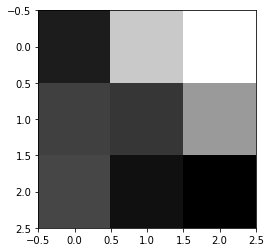

In [23]:
#gray scale로 확인해보고
plt.imshow(x0, cmap='gray')

In [24]:
# Finish checking, for our dataset
dia9.loc[0] 

Pregnancies                 0.352941
Glucose                     0.743719
BloodPressure               0.590164
SkinThickness               0.353535
Insulin                     0.000000
BMI                         0.500745
DiabetesPedigreeFunction    0.234415
Age                         0.483333
null1                       0.000000
Name: 0, dtype: float64

In [26]:
dia9_arr = dia9.values
dia9_arr.shape

(768, 9)

In [27]:
# 768 x 3 x 3 reshape
dia_array = dia9_arr.reshape(768,3,3)

In [28]:
dia_array.shape

(768, 3, 3)

#### saving data(numpy)

In [29]:
np.save('E:/RESEARCH/Datasets/pima/y.npy', y)

In [30]:
np.save('E:/RESEARCH/Datasets/pima/x.npy', dia_array)

In [32]:
np.save('E:/RESEARCH/Datasets/pima/patient.npy', patient)

In [33]:
xdata = np.load('E:/RESEARCH/Datasets/pima/x.npy')

In [34]:
xdata

array([[[0.35294118, 0.74371859, 0.59016393],
        [0.35353535, 0.        , 0.50074516],
        [0.23441503, 0.48333333, 0.        ]],

       [[0.05882353, 0.42713568, 0.54098361],
        [0.29292929, 0.        , 0.39642325],
        [0.11656704, 0.16666667, 0.        ]],

       [[0.47058824, 0.91959799, 0.52459016],
        [0.        , 0.        , 0.34724292],
        [0.25362938, 0.18333333, 0.        ]],

       ...,

       [[0.29411765, 0.6080402 , 0.59016393],
        [0.23232323, 0.13238771, 0.390462  ],
        [0.07130658, 0.15      , 0.        ]],

       [[0.05882353, 0.63316583, 0.49180328],
        [0.        , 0.        , 0.4485842 ],
        [0.11571307, 0.43333333, 0.        ]],

       [[0.05882353, 0.46733668, 0.57377049],
        [0.31313131, 0.        , 0.45305514],
        [0.10119556, 0.03333333, 0.        ]]])